## **K-Nearest Neighbor(KNN) Algorithm**

* KNN is a Supervised Learning, non-parametric algorithm and a lazy learner algorithm which categorizes the new data to the available categories based on the similarity.

* It is non-parametric that means it does not make any assumption on underlying data.

* It is a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset.


**Example:** Suppose, we have an image of a creature that looks similar to cat and dog, but we want to know either it is a cat or dog. So for this identification, we can use the KNN algorithm, as it works on a similarity measure. Our KNN model will find the similar features of the new data set to the cats and dogs images and based on the most similar features it will put it in either cat or dog category.

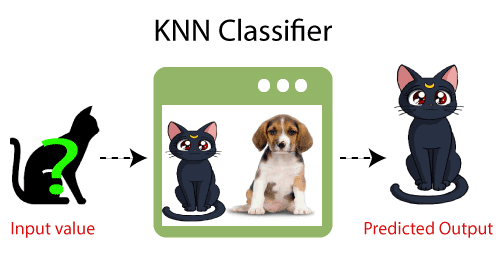

## **Objective of a KNN algorithm**

Suppose there are two categories, i.e., Category A and Category B, and we have a new data point x1(blue dot in the picture), To determine which category that dot belongs to we use KNN algorithm.
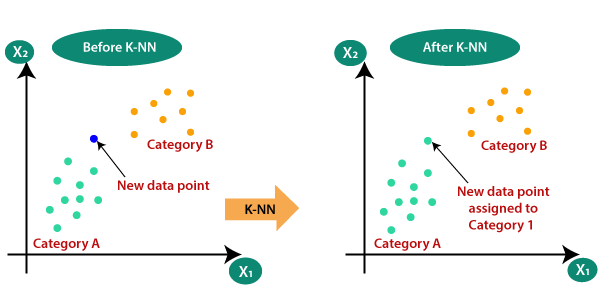

## **Working of KNN:**

The K-NN follows below steps:

Step-1: Select the number K of the neighbors

Step-2: Calculate the Euclidean distance of K number of neighbors

Step-3: Take the K nearest neighbors as per the calculated Euclidean distance.

Step-4: Among these k neighbors, count the number of the data points in each category.

Step-5: Assign the new data points to that category for which the number of the neighbor is maximum.

Step-6: Our model is ready.

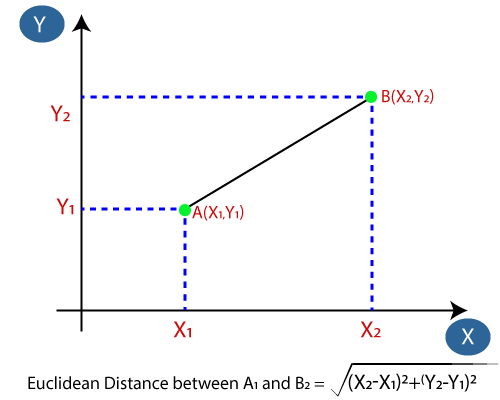

## **How to choose optimal value of K in KNN Algorithm?**

* There is no straightforward method to calculate the value of K in KNN. You have to play around with different values to choose the optimal value of K. Choosing a right value of K is a process called Hyperparameter Tuning.

* The value of optimum K totally depends on the dataset that you are using. The best value of K for KNN is highly data-dependent. In different scenarios, the optimum K may vary. It is more or less hit and trail method.

* You need to maintain a balance while choosing the value of K in KNN. K should not be too small or too large. 

* A small value of K means that noise will have a higher influence on the result. 
Larger the value of K, higher is the accuracy. If K is too large, you are under-fitting your model. In this case, the error will go up again. So, at the same time you also need to prevent your model from under-fitting. Your model should retain generalization capabilities otherwise there are fair chances that your model may perform well in the training data but drastically fail in the real data. Larger K will also increase the computational expense of the algorithm.

* There is no one proper method of estimation of K value in KNN. No method is the rule of thumb but you should try considering following suggestions:
1. **Square Root Method:** Take square root of the number of samples in the training dataset.
2. **Cross Validation Method:** We should also use cross validation to find out the optimal value of K in KNN. Start with K=1, run cross validation (5 to 10 fold),  measure the accuracy and keep repeating till the results become consistent. 

 K=1, 2, 3... As K increases, the error usually goes down, then stabilizes, and then raises again. Pick the optimum K at the beginning of the stable zone. This is also called **Elbow** Method.

3. Domain Knowledge also plays a vital role while choosing the optimum value of K.

4. K should be an odd number.

## **Python implementation of the KNN algorithm**

You can simply implement KNN in the same sheet of Logistic regression without having to perform EDA again.

That said, please find basic implementation of KNN below.

## **Data Pre-processing step**

In [4]:
# importing libraries  
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd 

In [5]:
#importing datasets  
dataset=pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv")

In [6]:
dataset.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [7]:
#Extracting Independent and dependent Variable  
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [8]:
### random state train test split will be same with all people using random_state=16
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=16)

In [9]:
#feature scaling
from sklearn.preprocessing import StandardScaler    
scaler=StandardScaler()
scaler

### using fit_transform to Standardize the train data
X_train=scaler.fit_transform(X_train)
X_train

X_test=scaler.transform(X_test)
X_test

array([[-0.23599631,  1.3020034 ,  0.06021527, ..., -0.05733909,
        -0.62524302, -0.4329837 ],
       [ 1.27629508, -1.3997441 ,  0.06021527, ...,  0.39619209,
         0.69017036,  0.52781071],
       [-0.84091286, -1.43010082, -0.96306329, ..., -1.11149262,
        -0.68544501, -1.04439833],
       ...,
       [-0.23599631,  0.178805  ,  0.98116598, ...,  0.88649605,
         0.68716026, -0.52032865],
       [-1.14337114,  0.81629598,  0.8276742 , ...,  1.31551203,
        -0.3031624 , -0.78236349],
       [ 2.18366991, -0.2765457 ,  0.77651027, ...,  1.805816  ,
         1.3523922 ,  1.05188039]])

Fitting K-NN classifier to the Training data:

Now we will fit the K-NN classifier to the training data. To do this we will import the KNeighborsClassifier class of Sklearn Neighbors library. After importing the class, we will create the Classifier object of the class. The Parameter of this class will be

n_neighbors: To define the required neighbors of the algorithm. Usually, it takes 5.

metric='minkowski': This is the default parameter and it decides the distance between the points.

p=2: It is equivalent to the standard Euclidean metric.
And then we will fit the classifier to the training data. Below is the code for it:

In [10]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(X_train, y_train) 

KNeighborsClassifier()

In [11]:
#Predicting the test set result  
y_pred= classifier.predict(X_test)  

In [12]:
y_pred

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [13]:
#Creating the Confusion matrix  , accuracy score and classification report.
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [14]:
cm= confusion_matrix(y_test, y_pred) 
print(cm)
score=accuracy_score(y_test, y_pred)
print(score)

[[127  20]
 [ 38  46]]
0.7489177489177489


KNN's accuracy is better when we perform in depth EDA just like we performed while implementing logistic regression.

That said, KNN has also been implemented in the other sheet to compare accuracy.


## Cross Validation

* Cross-validation is a statistical method used to estimate the performance (or accuracy) of machine learning models. 
<br><br>
* It is used to protect against overfitting in a predictive model, particularly in a case where the amount of data may be limited.
<br><br>
* In cross-validation, you make a fixed number of folds (or partitions) of the data, run the analysis on each fold, and then average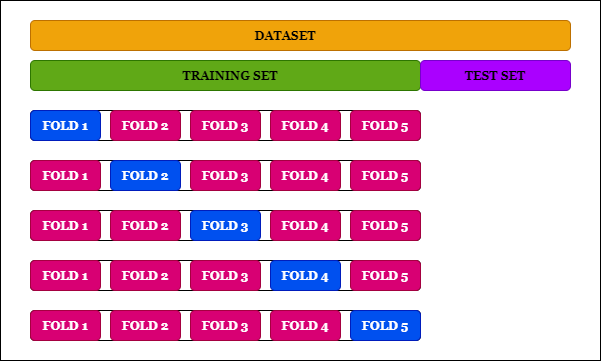 the overall error estimate.

### K fold cross validation

* K-fold cross validation is one way to improve the holdout method. 
<br><br>
* This method guarantees that the score of our model does not depend on the way we picked the train and test set. 
<br><br>
* The data set is divided into k number of subsets and the holdout method is repeated k number of times. 


In [17]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [21]:
#Implementing cross validation
 
k = 5
kf = KFold(n_splits=k, random_state=None)
model = KNeighborsClassifier()
acc_score = []


In [22]:
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.7272727272727273, 0.6948051948051948, 0.7337662337662337, 0.7647058823529411, 0.6993464052287581]
Avg accuracy : 0.723979288685171
